In [1]:
#read in combined motorcycle crash data
motorcycle_data <- read.csv("Datasets/statecycle_flag.csv",
                       encoding='latin-1')

In [2]:
#dataset.drop(['MC_PASSNGR_IND', 'MC_DVR_HLMTDOT_IND', 'MC_PAS_HLMTDOT_IND','MINOR_INJURY','MODERATE_INJURY','MAJOR_INJURY'], axis=1, inplace=True)
#dataset <- motorcycle_data[-c('MC_PASSNGR_IND', 'MC_DVR_HLMTDOT_IND', 'MC_PAS_HLMTDOT_IND','MINOR_INJURY','MODERATE_INJURY','MAJOR_INJURY')]
#abbv_cycle_2013 <- cycle_2013[c("CRN","MC_PASSNGR_IND","MC_DVR_HLMTON_IND","MC_DVR_HLMTDOT_IND","MC_DVR_HLMT_TYPE","MC_PAS_HLMTON_IND","MC_PAS_HLMTDOT_IND","MC_PAS_HLMT_TYPE")]

motorcycle_data<-within(motorcycle_data, rm('X','MC_PASSNGR_IND', 'MC_DVR_HLMTDOT_IND', 'MC_PAS_HLMTDOT_IND',
                           'MINOR_INJURY','MODERATE_INJURY','MAJOR_INJURY','CRN', 
                           'FATAL_OR_MAJ_INJ','CRASH_YEAR','COUNTY','MUNICIPALITY','COUNTY_YEAR',
                           'MOTORCYCLE_COUNT','FATAL_COUNT','MCYCLE_DEATH_COUNT','DEC_LAT','DEC_LONG',
                           'PSP_REPORTED','MC_DVR_HLMT_TYPE','MC_PAS_HLMT_TYPE','MC_PAS_HLMTON_IND'))


In [3]:
#one hot encode driver wearing helmet column

for(unique_value in unique(motorcycle_data$MC_DVR_HLMTON_IND)){
motorcycle_data[paste(" MC_DVR_HLMTON_IND", unique_value, sep = ".")] <- ifelse(motorcycle_data$MC_DVR_HLMTON_IND == unique_value, 1, 0)
}


In [4]:
str(motorcycle_data)

'data.frame':	96508 obs. of  90 variables:
 $ MC_DVR_HLMTON_IND   : Factor w/ 4 levels " ","N","U","Y": 1 1 3 3 1 3 1 1 1 1 ...
 $ INTERSTATE          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ STATE_ROAD          : int  1 0 0 0 1 1 1 0 0 1 ...
 $ LOCAL_ROAD          : int  1 1 1 1 0 0 0 1 1 0 ...
 $ LOCAL_ROAD_ONLY     : int  0 1 1 1 0 0 0 1 1 0 ...
 $ TURNPIKE            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WET_ROAD            : int  1 0 1 0 1 1 1 1 1 0 ...
 $ SNOW_SLUSH_ROAD     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ICY_ROAD            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SUDDEN_DEER         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SHLDR_RELATED       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ REAR_END            : int  0 0 0 0 0 0 0 0 1 1 ...
 $ HO_OPPDIR_SDSWP     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HIT_FIXED_OBJECT    : int  0 0 1 0 0 1 0 0 0 0 ...
 $ SV_RUN_OFF_RD       : int  0 0 1 1 0 1 0 0 0 0 ...
 $ WORK_ZONE           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PROPERTY_DAMAGE_ONLY: int  0 0 0 0 0 0 0 0 0 0 ...
 $ INJUR

In [5]:
#remove original driver wearing helmet column
motorcycle_data<-within(motorcycle_data, rm('MC_DVR_HLMTON_IND'))


In [6]:
#Choose columns from crash feature selection analysis
select_data <- motorcycle_data[c('FATAL','PHANTOM_VEHICLE','ALCOHOL_RELATED','LIMIT_65MPH','HAZARDOUS_TRUCK','DRUGGED_DRIVER')]
head(select_data)

FATAL,PHANTOM_VEHICLE,ALCOHOL_RELATED,LIMIT_65MPH,HAZARDOUS_TRUCK,DRUGGED_DRIVER
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,1,0,0,0


In [11]:
select <- cor(select_data)
round(select, 2)

,FATAL,PHANTOM_VEHICLE,ALCOHOL_RELATED,LIMIT_65MPH,HAZARDOUS_TRUCK,DRUGGED_DRIVER
FATAL,1.00,-0.01,0.19,0.01,0.03,0.12
PHANTOM_VEHICLE,-0.01,1.00,-0.03,0.00,0.00,-0.01
ALCOHOL_RELATED,0.19,-0.03,1.00,-0.01,0.00,0.17
LIMIT_65MPH,0.01,0.00,-0.01,1.00,0.00,0.00
HAZARDOUS_TRUCK,0.03,0.00,0.00,0.00,1.00,0.00
DRUGGED_DRIVER,0.12,-0.01,0.17,0.00,0.00,1.00


In [12]:
#correlation score for selected data
cor(select, method = "pearson", use = "complete.obs")


,FATAL,PHANTOM_VEHICLE,ALCOHOL_RELATED,LIMIT_65MPH,HAZARDOUS_TRUCK,DRUGGED_DRIVER
FATAL,1.00000000,-0.2983695,0.14251492,-0.2539668,-0.2278451,-0.01257574
PHANTOM_VEHICLE,-0.29836950,1.0000000,-0.33425356,-0.1886150,-0.2007031,-0.27957890
ALCOHOL_RELATED,0.14251492,-0.3342536,1.00000000,-0.3025426,-0.2708807,0.09530466
LIMIT_65MPH,-0.25396682,-0.1886150,-0.30254259,1.0000000,-0.1994725,-0.27198716
HAZARDOUS_TRUCK,-0.22784506,-0.2007031,-0.27088073,-0.1994725,1.0000000,-0.26370532
DRUGGED_DRIVER,-0.01257574,-0.2795789,0.09530466,-0.2719872,-0.2637053,1.00000000


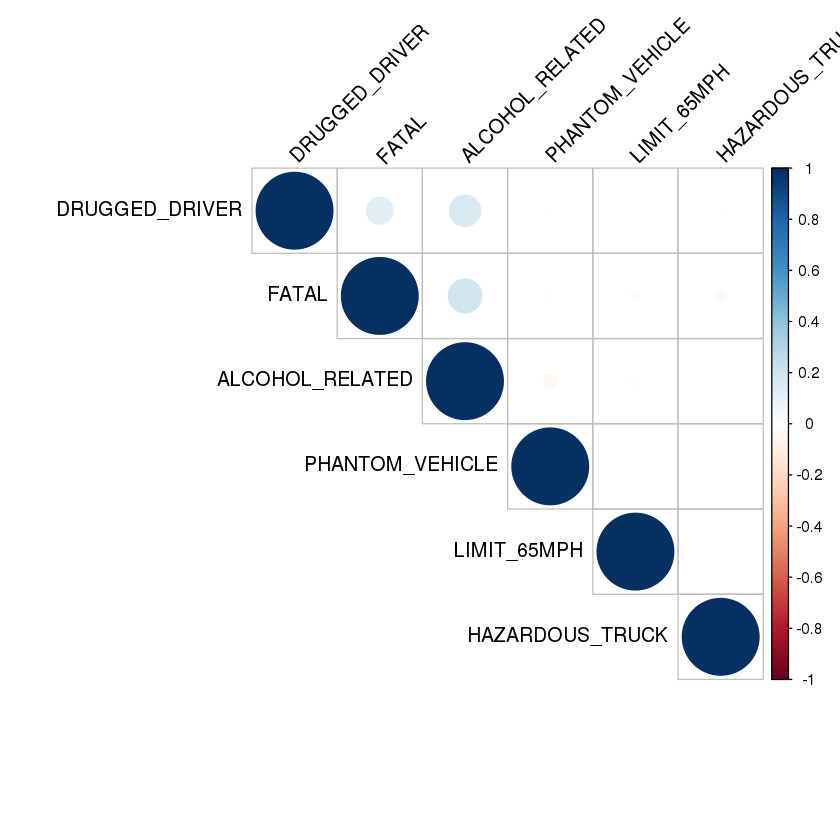

In [10]:
#correlation plot for selected data
library(corrplot)
corrplot(select, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [ ]:
#set up data for correlation
cycle <- cor(motorcycle_data)
round(cycle, 2)

In [ ]:
#check correlation for all data
cor(cycle, method = "pearson", use = "complete.obs")


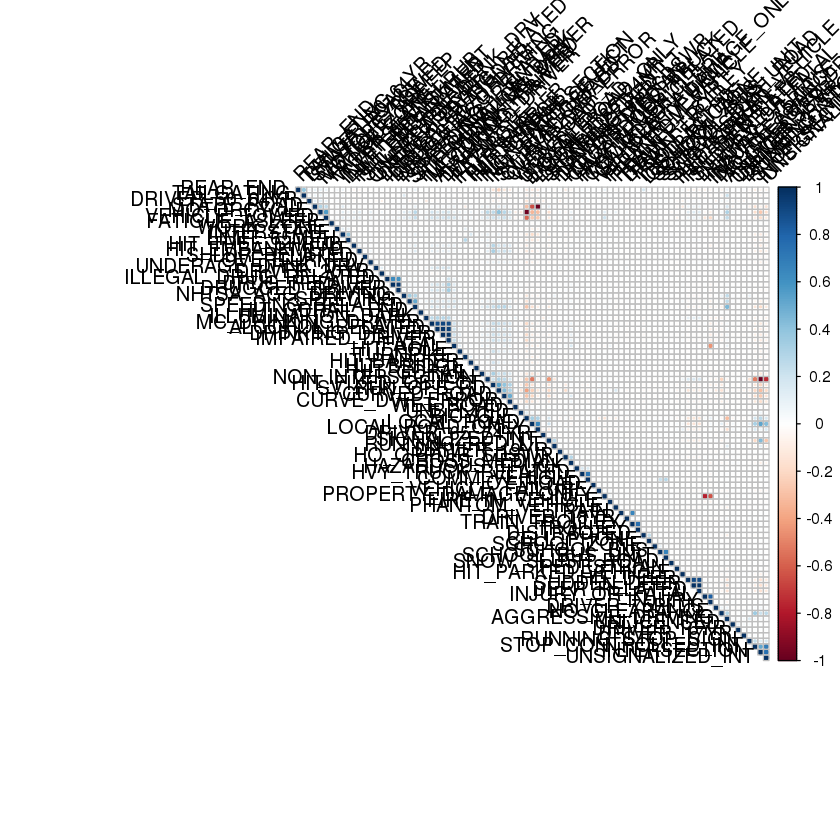

In [41]:
library(corrplot)
corrplot(cycle, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [16]:
table(select_data$FATAL)



    0     1 
92761  3747 

In [19]:
#create equal sample size of fatal and nonfatals
input_ones <- select_data[which(select_data$FATAL == 1), ]  # all 1's
input_zeros <- select_data[which(select_data$FATAL == 0), ]  # all 0's
set.seed(100)  # for repeatability of samples
input_ones_training_rows <- sample(1:nrow(input_ones), 0.7*nrow(input_ones))  # 1's for training
input_zeros_training_rows <- sample(1:nrow(input_zeros), 0.7*nrow(input_ones))  # 0's for training. Pick as many 0's as 1's
training_ones <- input_ones[input_ones_training_rows, ]  
training_zeros <- input_zeros[input_zeros_training_rows, ]
trainingData <- rbind(training_ones, training_zeros)  # row bind the 1's and 0's 

# Create Test Data
test_ones <- input_ones[-input_ones_training_rows, ]
test_zeros <- input_zeros[-input_zeros_training_rows, ]
testData <- rbind(test_ones, test_zeros)  # row bind the 1's and 0's 


In [21]:
logitMod <- glm(FATAL ~ PHANTOM_VEHICLE + ALCOHOL_RELATED + LIMIT_65MPH + HAZARDOUS_TRUCK + DRUGGED_DRIVER, data=trainingData, family=binomial(link="logit"))

predicted <- plogis(predict(logitMod, testData))  # predicted scores
# or
#predicted <- predict(logitMod, testData, type="response")  # predicted scores

In [23]:
summary(logitMod)


Call:
glm(formula = FATAL ~ PHANTOM_VEHICLE + ALCOHOL_RELATED + LIMIT_65MPH + 
    HAZARDOUS_TRUCK + DRUGGED_DRIVER, family = binomial(link = "logit"), 
    data = trainingData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7225  -0.9981  -0.4988   1.3680   1.3680  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.43756    0.03281 -13.334   <2e-16 ***
PHANTOM_VEHICLE   0.00921    0.25963   0.035   0.9717    
ALCOHOL_RELATED   1.91817    0.08576  22.367   <2e-16 ***
LIMIT_65MPH       0.79231    0.26879   2.948   0.0032 ** 
HAZARDOUS_TRUCK  13.37080  190.90946   0.070   0.9442    
DRUGGED_DRIVER    2.20053    0.26128   8.422   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7269.7  on 5243  degrees of freedom
Residual deviance: 6443.0  on 5238  degrees of freedom
AIC: 6455

Number of Fisher Scoring iterations: 12

In [37]:
library(caret)
predicted<-ifelse(predicted> 0.5,1,0)
cm<- confusionMatrix(testData$FATAL, predicted)
cm$table

          Reference
Prediction     0     1
         0 81768  8371
         1   674   451